In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
import scipy
import IPython

In [5]:
%matplotlib notebook

In [6]:
class Signal(object):
    """
    rate (int): sample rate
    samples (ndarray): samples
    """
    def __init__(self, rate, samples):
        self.rate = rate
        self.samples = samples
        self.nsamples = len(samples)
        
    def __add__(self, second):
        total = self.samples + second.samples
        return Signal(44100, total)
    
    def plot(self):
        # Graphs the given sound wave.
        dom=np.linspace(0, float(self.nsamples)/self.rate, self.nsamples)
        
        dft = scipy.fft(self.samples)
        x_vals = scipy.arange(1, len(dft)+1, 1)*1.
        x_vals = x_vals/len(self.samples)
        x_vals *= self.rate
        
        plt.subplot(121)
        plt.plot(dom, self.samples)
        plt.xlabel("Seconds")
        
        plt.subplot(122)
        plt.plot(x_vals, dft)
        
        plt.show()
        
    def export(self, filename):
        # Generates a .wav file.
        scale = np.max(np.abs(self.samples)) # Scales sample.
        samples = self.samples*32767./scale
        samples = scipy.int16(samples)
        wavfile.write(filename, self.rate, samples)
        
        

<IPython.core.display.Javascript object>


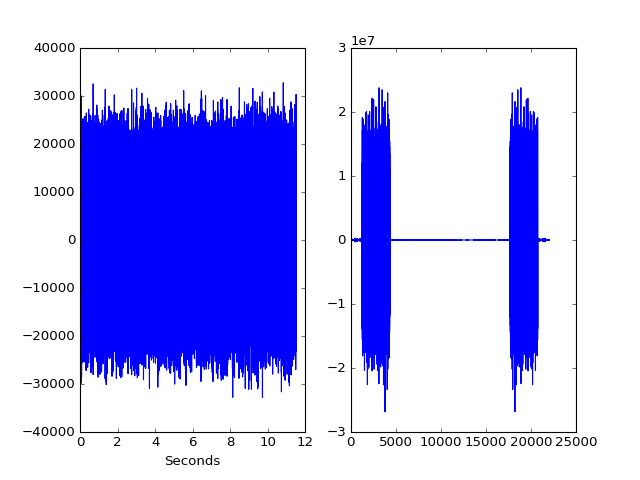

/Users/kearajune/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [7]:
rate, wave = wavfile.read('Noisysignal2.wav')
sig = Signal(rate, wave)
sig.plot()

In [8]:
# Generates a sine wave corresponding to an 'A' note (frequency: 440 Hz)
samplerate = 44100
frequency = 440
length = 5
wave_function = lambda x: scipy.sin(2*scipy.pi*x*frequency)
stepsize = 1./samplerate
sample_points = scipy.arange(0, length, stepsize)
samples = wave_function(sample_points)

sinewave = Signal(samplerate, samples)
sinewave.export("sine.wav") # Exports file. 

# Plays the sound wave in the notebook.
IPython.display.Audio('sine.wav')

In [9]:
# Generates a sound wave for a given frequency and duration
def make_wave(frequency, duration):
    """
    Inputs:
    frequency (float): frequency of note desired
    duration (float): length of time
    
    Returns:
    signal (Signal): the sound wave of the desired note for the desired length of time.
    """
    stepsize = 1./44100
    wave_function = lambda x: scipy.sin(2*scipy.pi*x*frequency)
    sample_points = scipy.arange(0, duration, stepsize)
    samples = wave_function(sample_points)
    
    return Signal(44100, samples)

In [10]:
def fourier_transform(A):
    """
    Inputs:
    A (ndarray): an array
    
    Returns:
    coeff (ndarray): an array of coeffs used to approximate the Fourier Transform.
    """
    coeff = np.zeros_like(A, dtype=complex)
    N = np.size(A)
    for k in xrange(N):
        total = 0
        for n in xrange(N):
            total += A[n]*np.exp(-(2.j*scipy.pi*k*n)/N)
        coeff[k] = total
    return coeff

In [11]:
# Compare SciPy's Fourier Transform algorithm to my own.
test = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print scipy.fft(test)
print fourier_transform(test)


[ 36.+0.j          -4.+9.65685425j  -4.+4.j          -4.+1.65685425j
  -4.+0.j          -4.-1.65685425j  -4.-4.j          -4.-9.65685425j]
[ 36. +0.00000000e+00j  -4. +9.65685425e+00j  -4. +4.00000000e+00j
  -4. +1.65685425e+00j  -4. -3.91886976e-15j  -4. -1.65685425e+00j
  -4. -4.00000000e+00j  -4. -9.65685425e+00j]


<IPython.core.display.Javascript object>


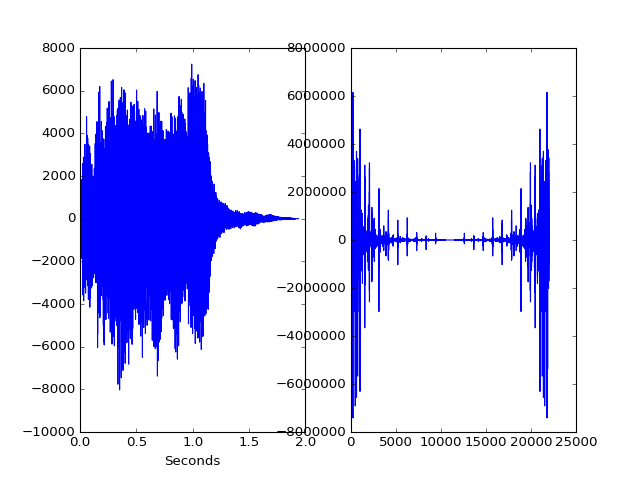

In [12]:
rate, wave = wavfile.read('tada.wav')
sig = Signal(rate, wave)
sig.plot()

In [19]:
# Create a chord with mulitple notes.
A = make_wave(440, .5)
C = make_wave(523.25, .5)
E = make_wave(659.25, .5)
chord1 = A+C+E
chord2 = A+E

chord1.export('chord.wav')
chord2.export('chord2.wav')



In [20]:
IPython.display.Audio('chord.wav')


In [21]:
IPython.display.Audio('chord2.wav')

In [25]:
samples = np.array([[chord1.samples], [A.samples], [E.samples]])
sound = Signal(44100, samples)
sound.export('sound.wav')

In [26]:
IPython.display.Audio('sound.wav')